In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('./Data acquisition/wing_leakage_data_samples_filt.xlsx')
data = data[data['MFC9'].notna()]
data.columns
data = data.drop(columns=['sample_number', 'total flow rate','Comments','Day'])
data = data.rename(columns={'number of leakage':'number_of_leakage'})
data.columns
single_leakage = data[data['number_of_leakage'] == 1]
two_leakage = data[data['number_of_leakage'] == 2]

single_leakage = single_leakage.drop(columns=['number_of_leakage'])
two_leakage = two_leakage.drop(columns=['number_of_leakage'])

single_leakage.columns

Index(['x1', 'y1', 'x2', 'y2', 'MFC6', 'MFC7', 'MFC8', 'MFC9', 'MFC10', 'MFC1',
       'MFC2', 'MFC3', 'MFC4', 'MFC5'],
      dtype='object')

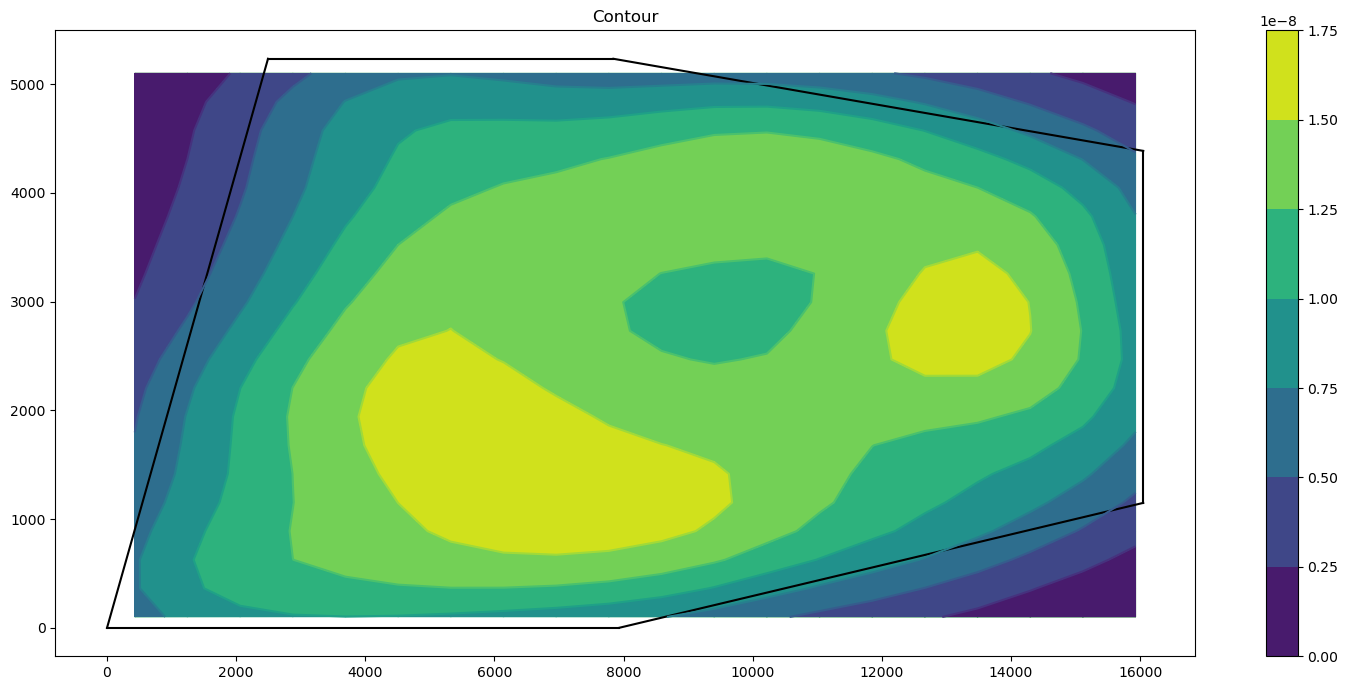

In [4]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
 

fig = plt.figure(figsize=(15,7))
# Create data: 200 points
data =  single_leakage[['x1','y1']]
x, y = single_leakage['x1'].T,single_leakage['y1'].T

plt.plot([0, 7930], [0, 0], 'k')
plt.plot([7930, 16048], [0, 1149], 'k')
plt.plot([16048, 16048], [1149, 4386], 'k')
plt.plot([16048, 7843], [4386, 5233], 'k')
plt.plot([7843, 2493], [5233, 5233], 'k')
plt.plot([2493, 0], [5233, 0], 'k')

nbins = 20
k = gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# contour
plt.title('Spread of leakage made across the wing')
plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
plt.contour(xi, yi, zi.reshape(xi.shape) )
cp = plt.contourf(xi, yi, zi.reshape(xi.shape))
plt.colorbar(cp)
fig1 = plt.gcf()
plt.tight_layout()
plt.show()
fig1.savefig('plot.png', dpi=100)